# Evaluation

## Test with analytical vector field

$$
\vec{B} = B_x \hat{x} + B_y \hat{y} + B_z \hat{z}
$$

$$
B_x = x^3, \quad B_y = -3x^2 y, \quad B_z = xy
$$

$$
\nabla \cdot \vec{B} = 0
$$

$$
\vec{J} = \nabla \times \vec{B} = x \hat{x} - y \hat{y} - 6xy \hat{z}
$$

$$
\nabla^2 \vec{B} = 6x \hat{x} - 6y \hat{y}
$$

In [ ]:
#| default_exp evaluation

In [ ]:
#| export
import numpy as np

In [ ]:
#| export
def magnitude(vector):
    return np.sqrt((vector**2).sum(-1))

def gradient(scalar, dx=None, dy=None, dz=None):

    if (dx is not None) and (dy is not None) and (dz is not None):
        Dx_scalar, Dy_scalar, Dz_scalar = np.gradient(scalar, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
    else:
        Dx_scalar, Dy_scalar, Dz_scalar = np.gradient(scalar, axis=[0, 1, 2], edge_order=2)

    return np.stack([Dx_scalar, Dy_scalar, Dz_scalar], axis=-1)
    
def divergence(vector, dx=None, dy=None, dz=None):
    vector_x, vector_y, vector_z = vector[..., 0], vector[..., 1], vector[..., 2]

    if (dx is not None) and (dy is not None) and (dz is not None):
        Dx_vector_x = np.gradient(vector_x, dx, axis=[0], edge_order=2)
        Dy_vector_y = np.gradient(vector_y, dy, axis=[1], edge_order=2)
        Dz_vector_z = np.gradient(vector_z, dz, axis=[2], edge_order=2)
    else:
        Dx_vector_x = np.gradient(vector_x, axis=[0], edge_order=2)
        Dy_vector_y = np.gradient(vector_y, axis=[1], edge_order=2)
        Dz_vector_z = np.gradient(vector_z, axis=[2], edge_order=2)

    return Dx_vector_x + Dy_vector_y + Dz_vector_z

def curl(vector, dx=None, dy=None, dz=None):
    vector_x, vector_y, vector_z = vector[..., 0], vector[..., 1], vector[..., 2]

    if (dx is not None) and (dy is not None) and (dz is not None):
        Dy_vector_x, Dz_vector_x = np.gradient(vector_x, dy, dz, axis=[1, 2], edge_order=2)
        Dx_vector_y, Dz_vector_y = np.gradient(vector_y, dx, dz, axis=[0, 2], edge_order=2)
        Dx_vector_z, Dy_vector_z = np.gradient(vector_z, dx, dy, axis=[0, 1], edge_order=2)
    else:
        Dy_vector_x, Dz_vector_x = np.gradient(vector_x, axis=[1, 2], edge_order=2)
        Dx_vector_y, Dz_vector_y = np.gradient(vector_y, axis=[0, 2], edge_order=2)
        Dx_vector_z, Dy_vector_z = np.gradient(vector_z, axis=[0, 1], edge_order=2)
    
    curl_x = Dy_vector_z - Dz_vector_y 
    curl_y = Dz_vector_x - Dx_vector_z
    curl_z = Dx_vector_y - Dy_vector_x

    return np.stack([curl_x, curl_y, curl_z], axis=-1)

def laplacian(scalar, dx=None, dy=None, dz=None):
    if (dx is not None) and (dy is not None) and (dz is not None):
        gradient_scalar = gradient(scalar, dx, dy, dz)
        Dx_scalar = gradient_scalar[..., 0]
        Dy_scalar = gradient_scalar[..., 1]
        Dz_scalar = gradient_scalar[..., 2]

        Dx_Dx_scalar = np.gradient(Dx_scalar, dx, axis=[0], edge_order=2)
        Dy_Dy_scalar = np.gradient(Dy_scalar, dy, axis=[1], edge_order=2)
        Dz_Dz_scalar = np.gradient(Dz_scalar, dz, axis=[2], edge_order=2)
    else:
        gradient_scalar = gradient(scalar)
        Dx_scalar = gradient_scalar[..., 0]
        Dy_scalar = gradient_scalar[..., 1]
        Dz_scalar = gradient_scalar[..., 2]

        Dx_Dx_scalar = np.gradient(Dx_scalar, axis=[0], edge_order=2)
        Dy_Dy_scalar = np.gradient(Dy_scalar, axis=[1], edge_order=2)
        Dz_Dz_scalar = np.gradient(Dz_scalar, axis=[2], edge_order=2)

    return Dx_Dx_scalar + Dy_Dy_scalar + Dz_Dz_scalar

def laplacian_vector(vector, dx=None, dy=None, dz=None):
    vector_x, vector_y, vector_z = vector[..., 0], vector[..., 1], vector[..., 2]

    if (dx is not None) and (dy is not None) and (dz is not None):
        laplacian_vector_x = laplacian(vector_x, dx, dy, dz)
        laplacian_vector_y = laplacian(vector_y, dx, dy, dz)
        laplacian_vector_z = laplacian(vector_z, dx, dy, dz)
    else:
        laplacian_vector_x = laplacian(vector_x)
        laplacian_vector_y = laplacian(vector_y)
        laplacian_vector_z = laplacian(vector_z)

    return np.stack([laplacian_vector_x, laplacian_vector_y, laplacian_vector_z], axis=-1)

def magnetic_energy(magnetic_field_vector):
    return (magnetic_field_vector**2).sum(-1) / (8*np.pi)

In [ ]:
def vector_map(vector):
    return magnitude(vector).sum(2).T

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Nx, Ny, Nz = 128, 64, 160

In [ ]:
x = np.linspace(0, 1, Nx)
y = np.linspace(2, 4, Ny)
z = np.linspace(5, 9, Nz)

In [ ]:
dx, dy, dz = np.diff(x)[0], np.diff(y)[0], np.diff(z)[0]
dx, dy, dz

(0.007874015748031496, 0.03174603174603163, 0.02515723270440251)

In [ ]:
xv, yv, zv = np.meshgrid(x, y, z, indexing='ij')

In [ ]:
r = np.stack([xv, yv, zv], axis=-1)
r.shape

(128, 64, 160, 3)

In [ ]:
def mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    Bx = x**3
    By = -3*(x**2)*y 
    Bz = x*y 
    return np.stack([Bx, By, Bz], axis=-1)

def norm_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.sqrt(x**6 + 9*(x**4)*(y**2) + (x**2)*(y**2))
    return scalar_value

def grad_Bx(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = 3*(x**2)
    y_comp = np.zeros_like(y)
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def grad_By(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = -6*x*y
    y_comp = -3*(x**2)
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def grad_Bz(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = y
    y_comp = x
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def laplacian_Bx(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = 6*x
    return scalar_value

def laplacian_By(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    sclar_value = -6*y
    return sclar_value

def laplacian_Bz(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.zeros_like(x)
    return scalar_value

def divergence_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.zeros_like(x)
    return scalar_value

def curl_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = x
    y_comp = -y 
    z_comp = -6*x*y 
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def laplacian_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = 6*x
    y_comp = -6*y 
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

In [ ]:
B = mag(r)
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

$$
|\vec{B}|
$$

In [ ]:
B_norm = norm_mag(r)
B_norm.sum(), B_norm.shape

(4487710.344260219, (128, 64, 160))

In [ ]:
B_norm_nu = magnitude(B)
B_norm_nu.sum(), B_norm_nu.shape

(4487710.344260219, (128, 64, 160))

In [ ]:
np.allclose(B_norm, B_norm_nu)

True

$$
\nabla B_x
$$

In [ ]:
gradient_Bx = grad_Bx(r)
magnitude(gradient_Bx).sum(), gradient_Bx.shape

(1315880.3149606301, (128, 64, 160, 3))

In [ ]:
gradient_Bx_nu = gradient(Bx, dx, dy, dz)
magnitude(gradient_Bx).sum(), gradient_Bx.shape

(1315880.3149606301, (128, 64, 160, 3))

In [ ]:
np.allclose(gradient_Bx, gradient_Bx_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

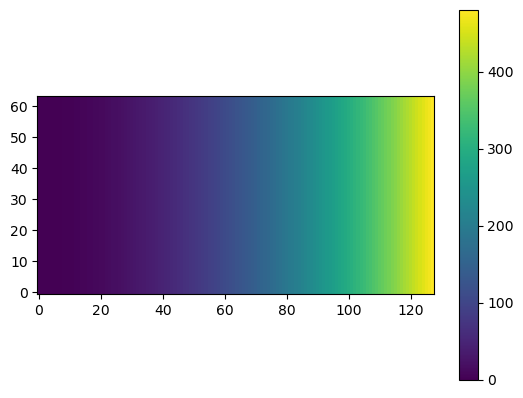

In [ ]:
plt.imshow(vector_map(gradient_Bx), origin='lower')
plt.colorbar()

<matplotlib.colorbar.Colorbar>

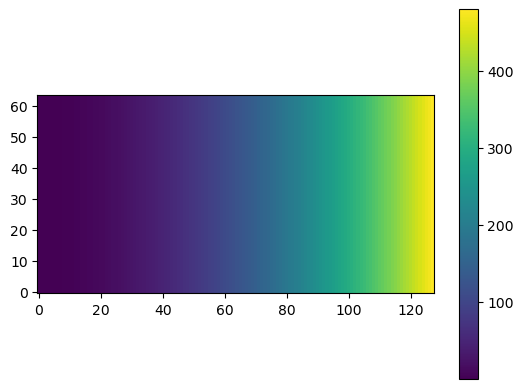

In [ ]:
plt.imshow(vector_map(gradient_Bx_nu), origin='lower')
plt.colorbar()

$$
\nabla B_y
$$

In [ ]:
gradient_By = grad_By(r)
magnitude(gradient_By).sum(), gradient_By.shape

(11881952.241119856, (128, 64, 160, 3))

In [ ]:
gradient_By_nu = gradient(By, dx, dy, dz)
magnitude(gradient_By).sum(), gradient_By.shape

(11881952.241119856, (128, 64, 160, 3))

In [ ]:
np.allclose(gradient_By, gradient_By_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

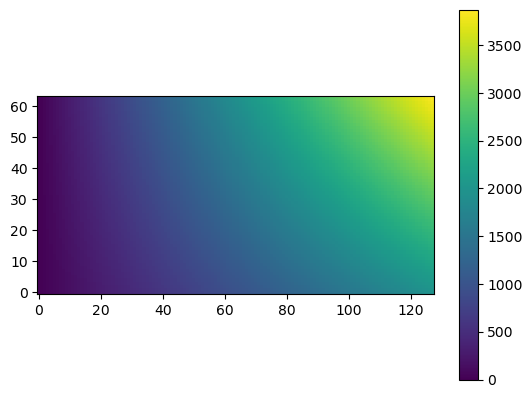

In [ ]:
plt.imshow(vector_map(gradient_By), origin='lower')
plt.colorbar()

<matplotlib.colorbar.Colorbar>

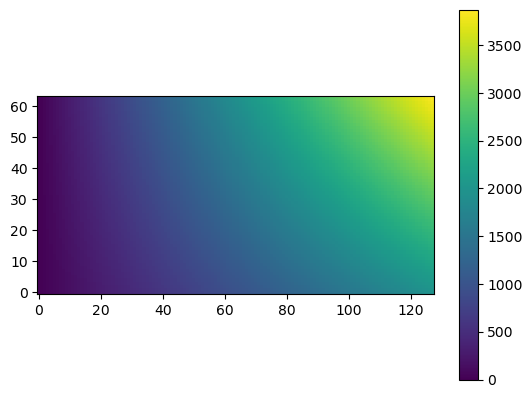

In [ ]:
plt.imshow(vector_map(gradient_By_nu), origin='lower')
plt.colorbar()

$$
\nabla B_z
$$

In [ ]:
gradient_Bz = grad_Bz(r)
magnitude(gradient_Bz).sum(), gradient_Bz.shape

(4006782.901267376, (128, 64, 160, 3))

In [ ]:
gradient_Bz_nu = gradient(Bz, dx, dy, dz)
magnitude(gradient_Bz).sum(), gradient_Bz.shape

(4006782.901267376, (128, 64, 160, 3))

In [ ]:
np.allclose(gradient_Bz, gradient_Bz_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

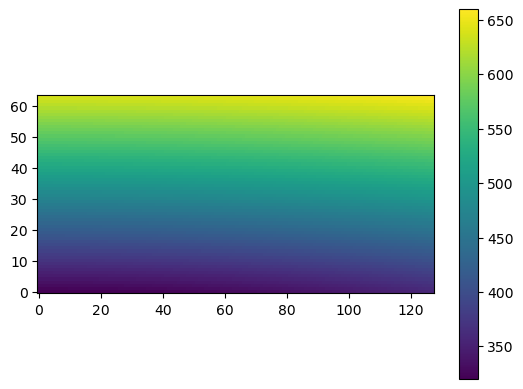

In [ ]:
plt.imshow(vector_map(gradient_Bz), origin='lower')
plt.colorbar()

<matplotlib.colorbar.Colorbar>

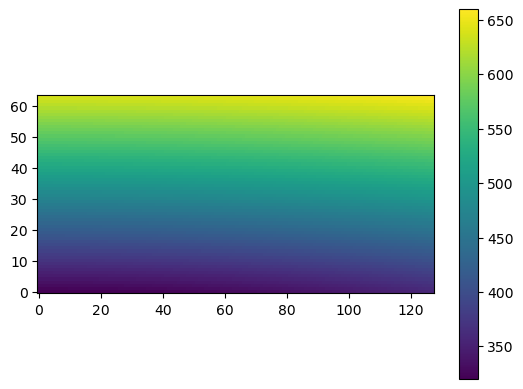

In [ ]:
plt.imshow(vector_map(gradient_Bz_nu), origin='lower')
plt.colorbar()

$$
\nabla \cdot \vec{B}
$$

In [ ]:
divergence_B = divergence_mag(r)
divergence_B.sum(), divergence_B.shape

(0.0, (128, 64, 160))

In [ ]:
divergence_B_nu = divergence(B, dx, dy, dz)
divergence_B_nu.sum(), divergence_B_nu.shape

(77.45551490663561, (128, 64, 160))

In [ ]:
np.allclose(divergence_B, divergence_B_nu, atol=1e-3)

True

$$
\nabla \times \vec{B}
$$

In [ ]:
curl_B = curl_mag(r)
magnitude(curl_B).sum(), curl_B.shape

(12802697.341366604, (128, 64, 160, 3))

In [ ]:
curl_B_nu = curl(B, dx, dy, dz) 
magnitude(curl_B_nu).sum(), curl_B_nu.shape

(12802697.34136661, (128, 64, 160, 3))

In [ ]:
np.allclose(curl_B, curl_B_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

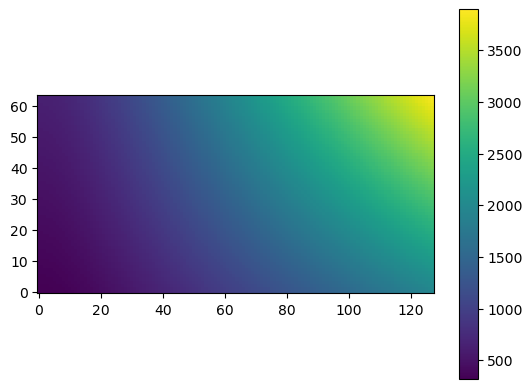

In [ ]:
plt.imshow(vector_map(curl_B), origin='lower')
plt.colorbar()

<matplotlib.colorbar.Colorbar>

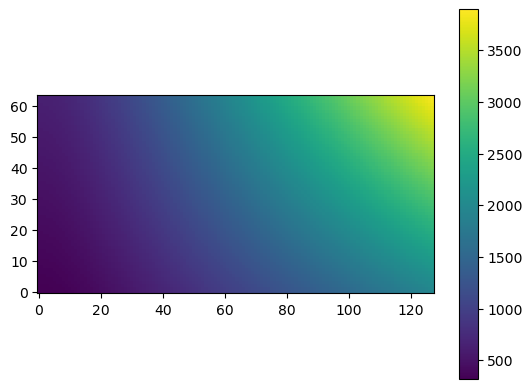

In [ ]:
plt.imshow(vector_map(curl_B_nu), origin='lower')
plt.colorbar()

$$
\nabla^2 B_x
$$

In [ ]:
Laplacian_Bx = laplacian_Bx(r)
Laplacian_Bx.sum(), Laplacian_Bx.shape

(3932159.9999999995, (128, 64, 160))

In [ ]:
Laplacian_Bx_nu = laplacian(Bx, dx, dy, dz)
Laplacian_Bx_nu.sum(), Laplacian_Bx_nu.shape

(3932159.999999984, (128, 64, 160))

In [ ]:
np.allclose(Laplacian_Bx, Laplacian_Bx_nu, atol=1e-1)

True

$$
\nabla^2 B_y
$$

In [ ]:
Laplacian_By = laplacian_By(r)
Laplacian_By.sum(), Laplacian_By.shape

(-23592960.0, (128, 64, 160))

In [ ]:
Laplacian_By_nu = laplacian(By, dx, dy, dz)
Laplacian_By_nu.sum(), Laplacian_By_nu.shape

(-23592959.999999776, (128, 64, 160))

In [ ]:
np.allclose(Laplacian_By, Laplacian_By_nu, atol=1e-1)

True

$$
\nabla^2 B_z
$$

In [ ]:
Laplacian_Bz = laplacian_Bz(r)
Laplacian_Bz.sum(), Laplacian_Bz.shape

(0.0, (128, 64, 160))

In [ ]:
Laplacian_Bz_nu = laplacian(Bz, dx, dy, dz)
Laplacian_Bz_nu.sum(), Laplacian_Bz_nu.shape

(-2.264449194822049e-08, (128, 64, 160))

In [ ]:
np.allclose(Laplacian_Bz, Laplacian_Bz_nu, atol=1e-1)

True

$$
\nabla^2 \vec{B}
$$

In [ ]:
Laplacian_B = laplacian_mag(r)
Laplacian_B.sum(), Laplacian_B.shape

(-19660799.999999993, (128, 64, 160, 3))

In [ ]:
Laplacian_B_nu = laplacian_vector(B, dx, dy, dz)
Laplacian_B_nu.sum(), Laplacian_B_nu.shape

(-19660799.999999825, (128, 64, 160, 3))

In [ ]:
np.allclose(Laplacian_B, Laplacian_B_nu, atol=1e-1)

True

<matplotlib.colorbar.Colorbar>

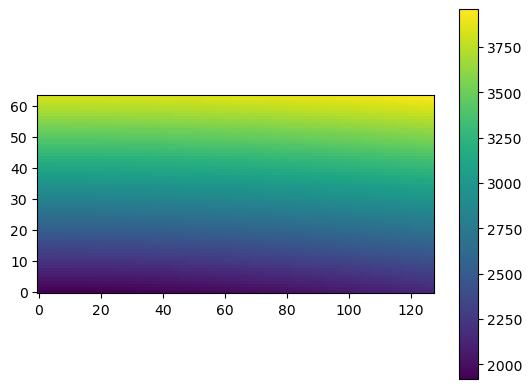

In [ ]:
plt.imshow(vector_map(Laplacian_B), origin='lower')
plt.colorbar()

<matplotlib.colorbar.Colorbar>

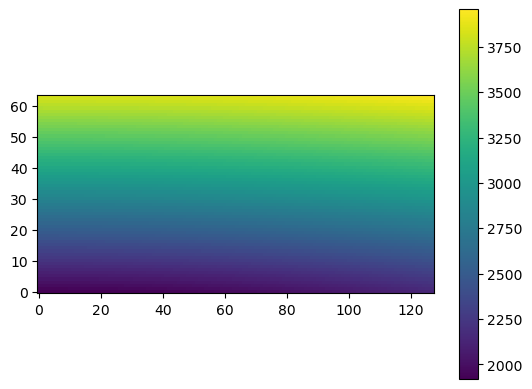

In [ ]:
plt.imshow(vector_map(Laplacian_B_nu), origin='lower')
plt.colorbar()